# Task Rabbit Data Exercise
Matt Federighi<br>
November 9, 2018<br>

Welcome to the TaskRabbit data analysis exercise.  We appreciate your time and effort in completing this exercise.  It helps TaskRabbit focus on candidates who are the best fit for the Data Analyst role, and also helps the candidate get an idea of the type of data we work with and the technical skills required to be successful in the role.<br>
<br>
<br>
For this exercise, a sample data file is provided which contains information about "recommendations".  A "recommendation" is the group of Taskers from which the Client can choose one to book.<br>
<br>
<br>
The columns are as follows:<br>
<br>
 recommendation_id    unique identifier for this recommendation, or set of taskers shown
 created_at           when this recommendation was shown to the client
 tasker_id            unique identifier for the Tasker
 position             the position of the Tasker in the recommendation set, 1 - first, 2 - second, etc.
 hourly_rate          the hourly rate for the Tasker when they were shown
 num_completed_tasks  the number of Tasks the Tasker had completed in that category, when they were shown
 hired                was the Tasker hired or not?  Only 1 tasker out of a set of recommendations can be hired
 category             the category of work the Client needs help with

### Reading the Data

In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
# Read in data, convert created_at to datetime 
df = pd.read_csv('sample.csv', parse_dates=['created_at'])

# view the head
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly


In [24]:
# Check the info for structure & null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
recommendation_id      30000 non-null object
created_at             30000 non-null datetime64[ns]
tasker_id              30000 non-null int64
position               30000 non-null int64
hourly_rate            30000 non-null int64
num_completed_tasks    30000 non-null int64
hired                  30000 non-null int64
category               30000 non-null object
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.8+ MB


In [25]:
# Check the data distributions
df.describe()

,tasker_id,position,hourly_rate,num_completed_tasks,hired
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.011072e+09,7.873600,57.482533,221.235700,0.056833
std,2.501822e+06,4.319442,36.222860,279.801812,0.231528
min,1.006647e+09,1.000000,18.000000,0.000000,0.000000
25%,1.008955e+09,4.000000,38.000000,23.000000,0.000000
50%,1.010579e+09,8.000000,45.000000,114.000000,0.000000
75%,1.013444e+09,12.000000,60.000000,300.250000,0.000000
max,1.015020e+09,15.000000,290.000000,1406.000000,1.000000


### 1. How many recommendation sets are in this data sample?

In [35]:
# count the number of unique recommendation sets
print('Recommendation sets in this data sample:', df.recommendation_id.nunique())

Recommendation sets in this data sample: 2100


### 2. Each recommendation set shows from 1 to 15 Taskers, what is:
     - average number of Taskers shown
     - median  number of Taskers shown

In [278]:
## Average number of Taskers. Group by recommendation_id, take the mean of position, take mean of all values, drop decimals
print('Average Number of Taskers per recommendation set:', np.floor((df.groupby('recommendation_id')['position'].mean()).mean()))

# Median number of Taskers.  Group by recommendation_id, take the median of position, take mean of all values, drop decimals
print(' Median Number of Taskers per recommendation set:', np.floor((df.groupby('recommendation_id')['position'].median()).median()))

Average Number of Taskers per recommendation set: 7.0
 Median Number of Taskers per recommendation set: 8.0


### 3. How many total unique Taskers are there in this data sample?



In [50]:
# Number of unique Taskers in Taskers column 
print('Total unique Taskers in sample data:', df.tasker_id.nunique())

Total unique Taskers in sample data: 830


### 4. Which Tasker has been shown the most? Which Tasker has been shown the least?


In [200]:
# Create df that groups by tasker_id and counts the number of recommendation sets that ID has appeared in 
taskers_shown = df.groupby('tasker_id')['position'].count().sort_values(ascending=False).reset_index()

# Tasker shown the most
print('Tasker', taskers_shown.iloc[0,0], 'has been shown the most at', max(taskers_shown.position.values), 'times')

# Taskers shown the least. Note that the min value for this column is 1, so there will be multiple 
print('There are', len(taskers_shown[taskers_shown['position'] == 1]), 'taskers that are tied for being shown the least.', 'For brevity, I have not shown their IDs.')

# If you want to see their IDs
#taskers_shown[taskers_shown['position'] == 1].tasker_id.values

Tasker 1014508755 has been shown the most at 608 times
There are 68 taskers that are tied for being shown the least. For brevity, I have not shown their IDs.


### 5. Which Tasker has been hired the most? Which Tasker has been hired the least?



In [201]:
# Create df that groups by tasker_id and sums the number of times a Tasker has been hired
taskers_hired = df.groupby('tasker_id')['hired'].sum().sort_values(ascending=False).reset_index()

# Tasker hired the most.
print('Tasker', taskers_hired.iloc[0,0], 'has been hired the most at', max(taskers_hired.hired.values), 'times')

# Taskers hired the least. Note that the min value for this column is 1, so there will be multiple 
print('There are', len(taskers_hired[taskers_hired['hired'] == 0]), 'taskers that are tied for being hired the least.', 'For brevity, I have not shown their IDs.')

# If you want to see their IDs
# taskers_hired[taskers_hired['hired'] == 0].tasker_id.values

Tasker 1012043028 has been hired the most at 59 times
There are 518 taskers that are tied for being hired the least. For brevity, I have not shown their IDs.


### 6. If we define the "Tasker conversion rate" as the number of times a Tasker has been hired, out of the number of times the Tasker has been shown, how many Taskers have a conversion rate of 100%


In [204]:
# Tasker Conversion Rate. Groupby tasker_id, create Tasker Conversion Rate
conversion_rates = df.groupby('tasker_id')['hired'].apply(lambda x: x.sum() / x.count()).reset_index()

# Taskers with 100% Tasker Conversion Rate
print('There are', len(conversion_rates[conversion_rates['hired'] == 1]), 'taskers with a 100% Tasker Conversion Rate.', 'For brevity, I have not shown their IDs.') 

# If you want to see the IDs
# conversion_rates[conversion_rates['hired'] == 1].tasker_id.values

There are 6 taskers with a 100% Tasker Conversion Rate. For brevity, I have not shown their IDs.


### 7. Would it be possible for all Taskers to have a conversion rate of 100%. Please explain your reasoning.


If we assume that the customer holds the ability to hire a Tasker, then it would not be possible for all Taskers to have a conversion rate of 100%. In most cases, the customer is looking to hire a single Tasker for their project, and after looking at the sample data, we can assume that the recommendation set will always spit out more than 1 Tasker. Therefore, it's not possible for all Taskers to have a conversion rate of 100%. <br><br>

Even if the recommendation set only spit out 1 Tasker, it does not mean that the customer would hire that Tasker every time. Therefore, we would still have instances where the Tasker Conversion Rate would not be 100%. <br><br>

From the company's perspective, we do not want all Tasker's to have a conversion rate of 100%. A large part of TaskRabbit's job is to provide a seamless user experience that keeps the customer satisfied. Therefore, we want to give our customer's a nice variety of quality recommendations to ensure they are making the most informed hiring decisions. 

### 8. For each category, what is the average position of the Tasker who is hired?


In [211]:
# Filter the DF to hired = 1 only
hired = df[df['hired'] == 1].copy()

# Average position of Taskers by category. Group by category, take the mean of position, take mean of all values, drop decimals
print('Average position of hired Taskers by category: \n \n', np.floor(hired.groupby('category')['position'].agg({'avg_position': 'mean'})))

Average position of hired Taskers by category: 
 
                     avg_position
category                        
Furniture Assembly           3.0
Mounting                     4.0
Moving Help                  4.0


### 9. For each category, what is the average hourly rate and average number of completed tasks for the Taskers who are hired?


In [219]:
# Average position of Taskers by category. Group by category, take the mean of position, take mean of all values, drop decimals
print('Average hourly rate & completed tasks of hired Taskers by category: \n \n', 
      np.floor(hired.groupby('category').agg({'hourly_rate': 'mean',
                                              'num_completed_tasks': 'mean'
                                             }).rename(columns={'hourly_rate': 'avg_hourly_rate', 'num_completed_tasks': 'avg_num_completed_tasks'})))

Average hourly rate & completed tasks of hired Taskers by category: 
 
                     avg_hourly_rate  avg_num_completed_tasks
category                                                    
Furniture Assembly             38.0                    249.0
Mounting                       50.0                    284.0
Moving Help                    63.0                    273.0


### 10. Based on the previous, how would you approach the question of:

    How can we use market data to suggest hourly rates to Taskers that would maximize their opportunity to be hired?

    Please describe in detail, with code and formulas that support your model.

There are many ways we can suggest hourly rates to Taskers that would maximize their opportunity to be hired, but I would start by: <br>
<br>
1. Conduct a more thorough EDA. <br>
   What we did above did not provide us with sufficient information to create a model. With a more thorough EDA, we can visualize relationships better and get a more intuitive understanding of the data. Some options are: <br>
    - Binning the num_completed_tasks column to gauge the level of experience for a Tasker<br>
    - Compare the hourly rates for hired Taskers vs Non-hired Taskers (on experience level, category, rate, etc.)<br>
    - Check if the position matters<br>
    - Looking at the created date to see if there are any trends<br>
<br>        
2. The next step would be to pre-process the data.<br>
   We need to scale the data to ensure all features are on the same scale (normalize or standardize the data)<br>
 <br>  
3. From there, we can start to run a few models on the data. <br>
   We should start simple, running linear regressions and potentially logistic (will you be hired based on these parameters)<br>
   If we are unsatisfied with the results, we can then move towards supervised or unsupervised learning. We can look to create some
   features from the current dataset, build some clusters, and create a machine learning model that can give us the best rate
   based on some number of input features. <br>
   Cross-validating models is extremely important here. Simple > Complex in most cases. 

#### Continuing the EDA

In [433]:
# Create a new df with only relevant values
new_df = df[['position', 'hourly_rate', 'num_completed_tasks', 'hired', 'category']]

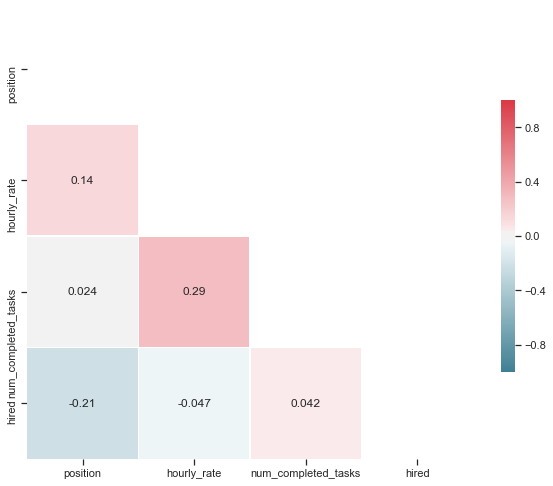

In [16]:
# Let's plot the correlation matrix and see what we can find out
corr = new_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Great start here. Our variables do not have strong correlations which means we can place all these variables in a model without worring about multicollinearity. It also tells us that we do not need to reduce the dimensionality of the dataframe, at least not yet.<br><br>
Now let's take a look at the distributions of these variables. 

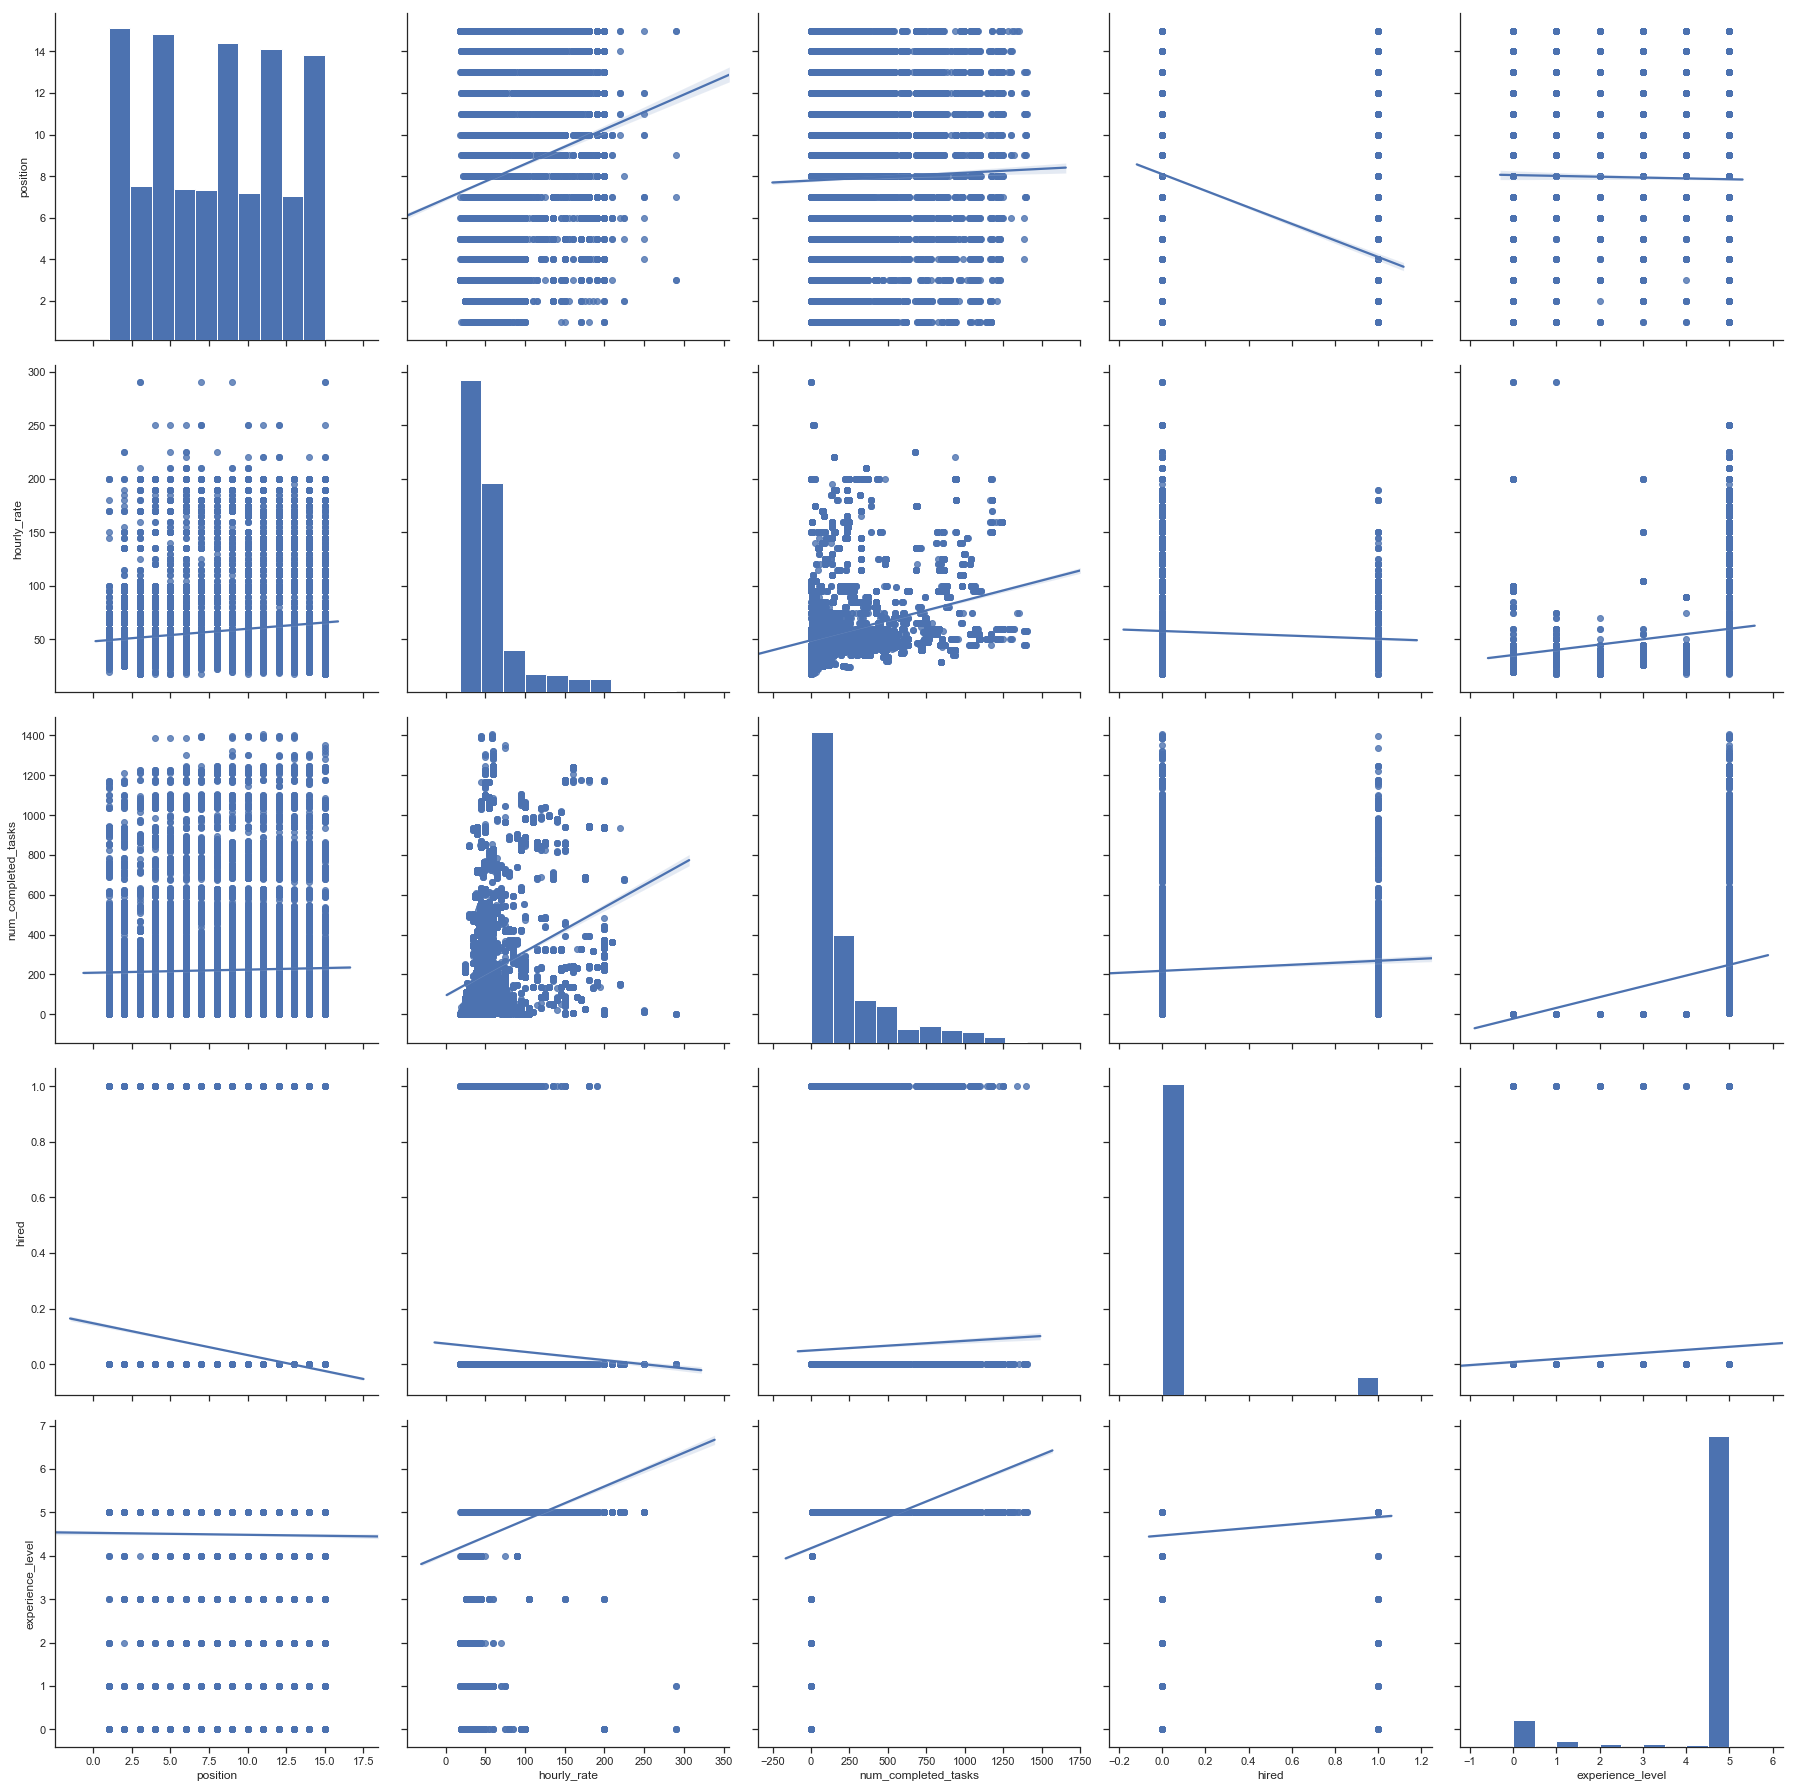

In [220]:
# Plot pairplot
sns.set(style="ticks")
sns.pairplot(new_df, kind='reg', height=5, palette='husl') 

Interesting. We can see a few patterns emerge in the data, such as: <br><br>

1. As position increases in the recommendation set, the hourly rate of the tasker also increases. That is interesting. <br>
2. Position seems to have a negative affect on whether someone is hired. This makes intuitive sense, since if the Tasker's position in the recommendation set is not towards the top, that Tasker will be less likely to be hired. <br>
3. We can also see a decline in the number of Taskers hired as the hourly rate increases. Again, this makes sense because a higher rate is more expensive and does not always mean that Tasker is good at the task. <br>
4. The hourly rate increase as the number of completed tasks increases. Given the spread of the data, I would assume that the R-2 is fairly low for that regression line. The data is highly skewed towards the lower rates. If we remove outliers, we may get a different result here.<br> 
<br>
Now what I'd like to do is create a new column that bins the num_completed_tasks. This will give us a general idea of experience level for the taskers and allow us to make more accurate recommendations. It's pretty clear that the data is skewed, but let's take a look at both the mean and the median number of completed tasks in the dataset to help us determine the binning. 

In [438]:
print('Mean Number of Completed Tasks:', new_df.num_completed_tasks.mean())
print('Median Number of Completed Tasks:', new_df.num_completed_tasks.median())

Mean Number of Completed Tasks: 221.2357
Median Number of Completed Tasks: 114.0


There is a large difference between the mean and median. This is because the data is skewed. So, let's stick with the median for binning. Since the median is 114 completd tasks, we can say that the average person (intermediate) has completed around 100 tasks. <br>
<br>
Here's how the binning breaks down for completed tasks: <br>
<br>
0-49: Fundamental Awareness (basic knowledge)<br>
50-99: Novice (limited experience)<br>
10-149: Intermediate (practical application)<br>
15-199: Advanced (applied theory) <br>
200+: Expert (recognized authority)

In [441]:
# Create copy of the previous DF
bins_df = df.copy()

# Create bins for the num_completed_tasks
bins_df['bin'] = pd.cut(new_df['num_completed_tasks'], [-1, 49, 99, 149, 199, 5000], 
                       labels=['0-49', '50-99', '100-149', '150-199', '200+'])

# View the head
bins_df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category,bin
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly,150-199
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly,150-199
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly,0-49
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly,200+
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly,0-49


Great! Now, let's compare the rates (mean, median, and mode) for Taskers who have been hired, based on their bin. This will allow us to better recommend rates to Taskers based on their skill level. <br>

In [442]:
# Mean, Median, Mode
bin_mean = bins_df.groupby(['category', 'bin', 'hired'])['hourly_rate'].mean().reset_index()
bin_median = bins_df.groupby(['category', 'bin', 'hired'])['hourly_rate'].median().reset_index()
bin_mode = bins_df.groupby(['category', 'bin', 'hired'])['hourly_rate'].agg(lambda x : x.value_counts().index[0]).reset_index()

# New Pivot Table function for all dfs: 
def pivot_calc(dataframe):

    # Create pivot table: Index = hired ; Columns = category Type ; Values = hourly_rate
    dataframe = dataframe.pivot_table(index=['category', 'bin'], columns='hired', values='hourly_rate')

    # Rename the columns
    dataframe.columns = ['not_hired_rate', 'hired_rate']

    # Create a Difference Column
    dataframe['rate_difference'] = dataframe['not_hired_rate'] - dataframe['hired_rate']

    # Reset the index to clean up the df
    dataframe = dataframe.reset_index()

    # Return the df
    return dataframe

In [443]:
# View the output
print('Average Rates per Category \n' , pivot_calc(bin_mean))
print('\n \n Median Rates per Category \n' , pivot_calc(bin_median))
print('\n \n Mode Rates per Category \n' , pivot_calc(bin_mode))

Average Rates per Category 
               category      bin  not_hired_rate  hired_rate  rate_difference
0   Furniture Assembly     0-49       33.753108   29.653061         4.100047
1   Furniture Assembly    50-99       38.369808   34.964602         3.405207
2   Furniture Assembly  100-149       37.972085   35.857143         2.114943
3   Furniture Assembly  150-199       43.503628   39.694444         3.809184
4   Furniture Assembly     200+       47.327381   46.547009         0.780372
5             Mounting     0-49       41.354489   37.891667         3.462822
6             Mounting    50-99       49.446655   49.460000        -0.013345
7             Mounting  100-149       51.542502   52.085714        -0.543212
8             Mounting  150-199       56.852000   52.187500         4.664500
9             Mounting     200+       58.001513   54.965116         3.036397
10         Moving Help     0-49       53.737748   46.847134         6.890614
11         Moving Help    50-99       86.311769

These tables are a little difficult to read, but we are beginning to see some patterns emerge now that we have binned the num_completed_tasks column. For almost all categories, the Taskers with the more completed tasks are charging more than Taskers with fewer completed tasks. This is to be expected, but this information will allow us to recommend a rate that better suits the the experience level of the Tasker. <br>
<br>
We could spend a lot of time analyzing this table, taking in all the available information. But, I only want to talk about a few rows that really stand out to me. <br>
<br>
1. Moving Help<br>
<br>
              completed_tasks  not_hired_rate  hired_rate       difference <br>
<br>              
Moving Help (MEAN)       200+      104.019979   71.547325        32.472654 <br>
Moving Help (MEDIAN)     200+              95          50               45 <br>
Moving Help (MODE)       200+              95          45               50 <br>
<br>
There is a huge discrepancy in the hourly rate between the Taskers who are hired and the Taskers who are not hired. To make the category more competitive, it may be a good idea to recommend to Taskers with more than 200 completed tasks to lower their rates in the Moving Help category. They could be hired more frequently if they do. <br>
<br>
2. Brand new Taskers<br>
<br>
                    completed_tasks  not_hired_rate  hired_rate       difference<br>
<br>              
Furniture Assembly (MEAN)      0-49       33.753108   29.653061         4.100047 <br>
Furniture Assembly (MEDIAN)    0-49              29          28                1 <br>
Furniture Assembly (MODE)      0-49              29          26                3 <br>
<br>
Mounting (MEAN)                0-49       41.354489   37.891667         3.462822 <br>
Mounting (MEDIAN)              0-49              38          37                1 <br>
Mounting (MODE)                0-49              38          37                1 <br>
<br>
Moving Help (MEAN)             0-49       53.737748   46.847134         6.890614 <br>
Moving Help (MEDIAN)           0-49              40          38                2 <br>
Moving Help (MODE)             0-49              38          40               -2 <br>
<br>
This is probably the most important aspect of this dataset. We want more Taskers to join Taskrabbit, so we need to make sure our recommended rates for these new Taskers is accurate. We want to get these new Taskers off to a great start and reduce churn. While some of these differences seem small (4.10, 3.46, 6.89), those small differences can mean the difference between hiring a Tasker and not hiring a Tasker. There are some outliers in the dataset, so I would recommend we use the median or mode hourly rate as a recommendation. Not only are the rates lower than the mean, but they are more true to the hiring activity on the platform. 

Before I make any recommendations, I would want to conduct a more thorough EDA to ensure I have a strong understanding of the data. There are a few more items I would like to look at, such as the distribution of hired Taskers based on position as well as the time of day. I do not believe Taskers have the ability to optimize when they appear in the recommendation sets, but it's still interesting information to look at. 

In [445]:
# 
bins_df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category,bin
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly,150-199
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly,150-199
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly,0-49
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly,200+
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly,0-49


Text(0.5,0,'Position in Recommendation Set')

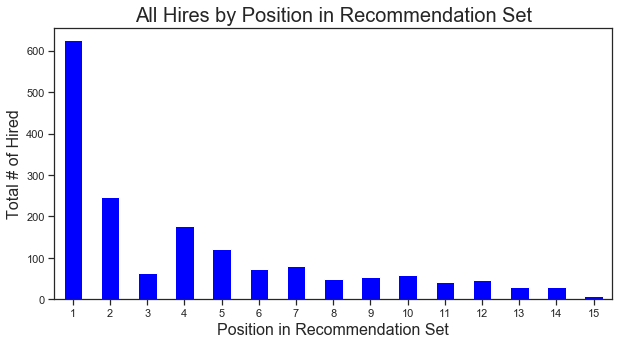

In [458]:
# Create a Plot that counts the number of hires by Day of Week
plt.figure(figsize=(10,5))
positioning = hired.position.value_counts().sort_index()
positioning.plot(kind='bar', stacked=True, color='blue')
plt.xticks(rotation=0)
plt.title('All Hires by Position in Recommendation Set', fontsize=20)
plt.ylabel('Total # of Hired', fontsize=16)
plt.xlabel('Position in Recommendation Set', fontsize=16)

As we could have expected, the higher you are in the recommendation set, the more you will be hired. In the distribution above, we can see that Taskers in the first, second, and fourth positions are hired the most. It's interested that there's a drop in hires in the third position. There are 3 people per view in the recommendation set, and we can see small spikes at the first position in each of those views (1, 4, 7, 10). This tells us that people generally hire Taskers based on their positioning not only in the recommendation set, but also in the view of the recommendation set. <br>
<br>
Note that I plotted this for each category, but all of the categories show the same distribution. To save space and computing power, I have removed them from this EDA. <br>
<br>
Let's take a look at the created_at column to see if we can find any more interesting trends. 

In [229]:
# Check the timeframe for the data
print('Start Date of Data:', min(df.created_at.dt.date))
print('  End Date of Data:', max(df.created_at.dt.date))

Start Date of Data: 2017-09-01
  End Date of Data: 2017-09-30


As we can see, this dataset spans 1 month in 2017. Let's see if we can find any trends in this month

Text(0.5,0,'Hour of Day')

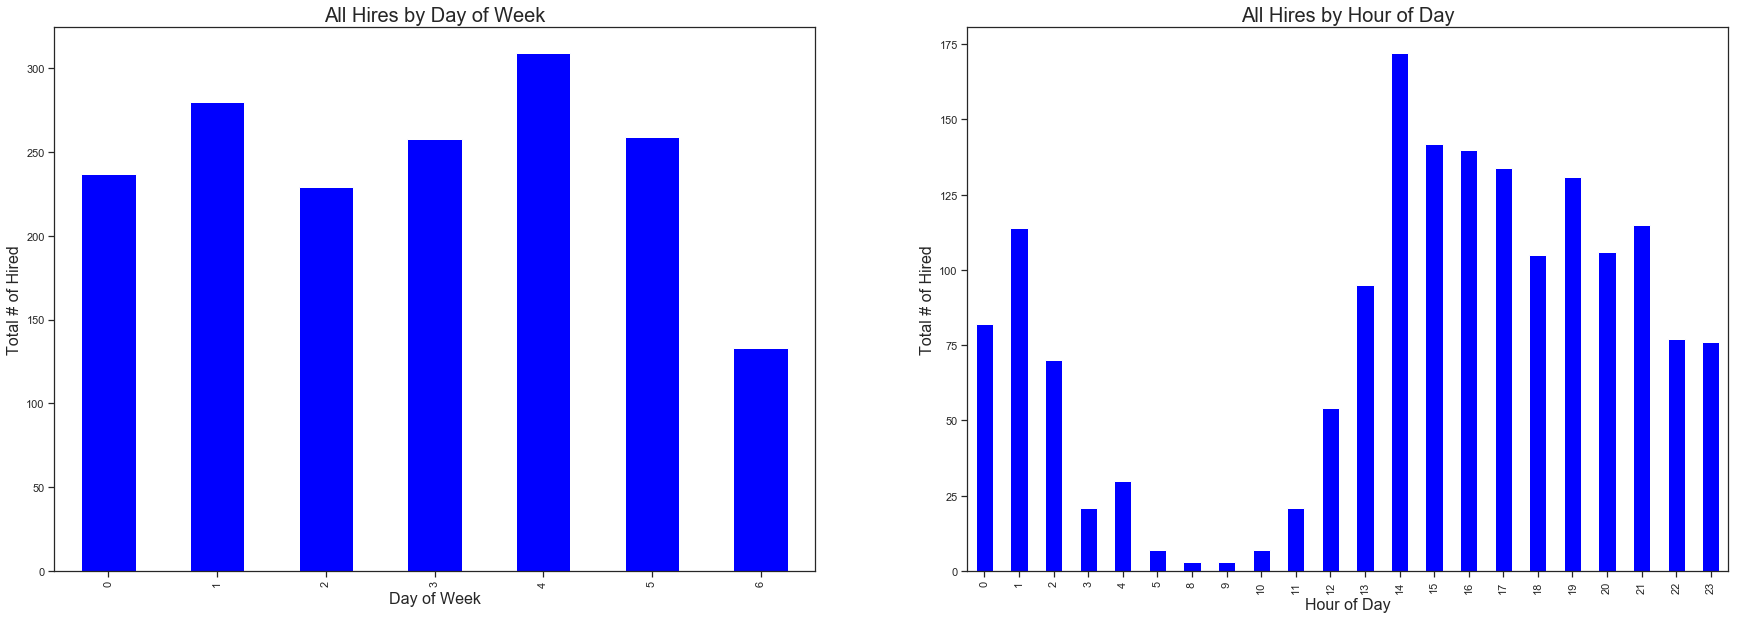

In [313]:
# Setup the subplot settings
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=2, figsize=(30,10))

# Create a Plot that counts the number of hires by Day of Week
hired_by_day = hired.created_at.dt.weekday.value_counts().sort_index()
hired_by_day.plot(kind='bar', stacked=True, color='blue', ax=ax1)
plt.xticks(rotation=0)
ax1.set_title('All Hires by Day of Week', fontsize=20)
ax1.set_ylabel('Total # of Hired', fontsize=16)
ax1.set_xlabel('Day of Week', fontsize=16)

# Create a Plot that counts the number of hires by Hour of Day
hired_by_hour = hired.created_at.dt.hour.value_counts().sort_index()
hired_by_hour.plot(kind='bar', stacked=True, color='blue', ax=ax2)
ax2.set_title('All Hires by Hour of Day', fontsize=20)
ax2.set_ylabel('Total # of Hired', fontsize=16)
ax2.set_xlabel('Hour of Day', fontsize=16)

DAY OF WEEK<br>
 - Tuesday(1) and Saturday (4) seem to have the most number of hires. <br>
 - Sunday has the fewest number if hires. <br>
 - There is nothing particularly interesting about this plot. <br>
<br>
HOUR OF DAY<br>
 - There is a large spike at 1am for some reason. Maybe people are being kept awake at night by the things they need to complete, so they use TaskRabbit so they can go to sleep at night :) <br>
 -  2pm has the largest number of hires. I think this makes sense because that 2pm feeling hits you ar work, you realize that you have a bunch of stuff you need to get done, so you go on TaskRabbit and hire someone to help you. Could be the next marketing campaign :) <br>
 <br>
While time series data can be interesting, for this dataset we do not know 

#### Final Thoughts

Most of this information we just gathered is pretty intuitive, but it enhances our understanding of the dataset and ensures we are making the appropriate decisions when recommending rates to Taskers. <br>
<br>
I would recommend that we bin the Taskers by the number of completed tasks, and recommend a rate to the Tasker based on that bin as well as the category. I do not know enough about the recommendation set algorithm at this time, so I'm unsure if the position or time of day can be optimized by the Tasker. <br>
<br>
I initially recommended scaling the data and potentially placing this into a Machine Learning algorithm. At this time, I am not going to build out a Machine Learning algorithm that spits out a recommended rate because it seems like overkill. In an actual working environment I would conduct my analysis similar to how I have done it here. First thing is always conduct a thorough EDA to ensure I understand the dataset completely. From there, I would plot and group the data in many different way to find relationships between the variables. I always prefer simplicity over complexity, and I think what we have above is a decent start at recommending rates to Taskers. <br>
<br>
What I would recommend is that we test out this method and closely watch the churn of new Taskers. If the churn rate of new Taskers is increasing, then we need to revisit this problem to ensure we are setting up the Taskers for success. If churn starts to drop, then we can continue optimizing our methodology and then scale it. 